# Atividade: Neurônio Artificial

**INSTITUTO FEDERAL DE MINAS GERAIS**  
*Departamento de Engenharia e Computação*  

**Professor:** Ciniro Nametala**  
**Aluno:** Víctor Hordones Ramos


### Exercício 1: 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
def neuronio(x, y, w0, w1, w2, bias): #w0 é o peso do bias
    soma = (x * w1) + (y * w2) - (bias * w0) #na equacao basica a soma seria u
    return 1 if soma > 0 else 0 #funcao degrau


In [63]:
#leitura
dados = pd.read_csv('amostra_bivariada.csv', sep=';', decimal=',')

#convertendo para float se precisar
dados['x'] = pd.to_numeric(dados['x'], errors='coerce')
dados['y'] = pd.to_numeric(dados['y'], errors='coerce') #coerce serve pra forcar um dado a ser numerico (nesse caso)

dados.head()

,x,y
0,1.183988,1.832880
1,1.523565,2.293337
2,2.199241,2.342880
3,2.768052,2.179136
4,2.165374,1.888445


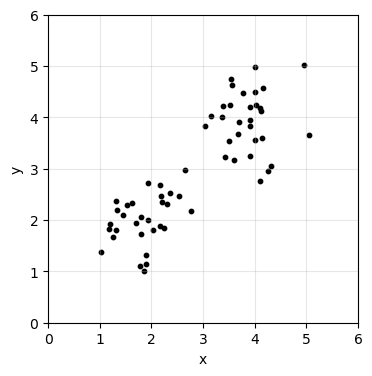

In [64]:
#criando grafico de dispersao
plt.figure(figsize=(4,4))#dimensao do grafico nesse caso 4x4 cm
plt.scatter(dados['x'], dados['y'], c='black', s=10) #scatter é o grafico desse de bolinhas
plt.xlim(0, 6) #limites
plt.ylim(0, 6) #limites
plt.xlabel('x') #rotulos
plt.ylabel('y') #rotulos
plt.grid(True, alpha=0.3) #transparencia
plt.show()

In [65]:
#setando valores dos pesos e bias
w0 = -6
w1 = 1
w2 = 1 
bias = -1 

#aplicando a funcao neuronio aos dados
classificacoes = []
for i, linha in dados.iterrows(): #i = indice da linha para cada linha no dataset coloque dentro de linha
    classe = neuronio(linha['x'], linha['y'], w0, w1, w2, bias)
    classificacoes.append(classe)

#adicionando as classificacoes ao dataframe
dados['classe'] = classificacoes
#print(dados)

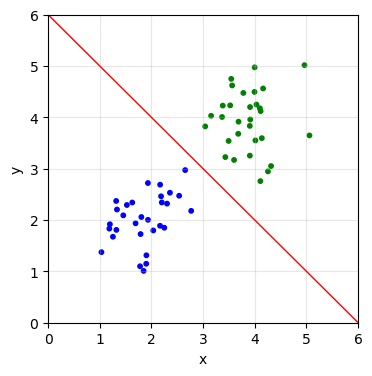

In [66]:
plt.figure(figsize=(4, 4))
cores = ['blue' if c == 0 else 'green' for c in dados['classe']]
plt.scatter(dados['x'], dados['y'], c=cores, s=10)

#gerando a reta de separacao
eixox = np.linspace(0, 6, 100)
eixoy = (w0 * -1) - eixox
plt.plot(eixox, eixoy, 'r-', linewidth=1)

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.show()

### Exercício 2

In [67]:
#funcao plota grafico
def plota_grafico(x, y, titulo):
    plt.figure(figsize=(4, 4))
    plt.plot(x, y, 'b-', linewidth=2) #b- = grafico de linha preta
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    plt.show()

#funcao degrau
def degrau(x):
    return np.where(x >= 0, 1, 0)# np.where() gera uma lista com base na condicao: condicional, return true, return false

#funcao degrau bipolar - voltar
def degrau_bipolar(x):
    return np.where(x >= 0, 1, -1)

#funcao rampa simetrica
def rampa_simetrica(a, x):
    return np.where(x > a, a, np.where(x < -a, -a, x))

#funcao relu
def relu(x):
    return np.maximum(0, x)

#funcao logistica
def logistica(x, beta):
    return 1 / (1 + np.exp(-beta * x))

#funcao tangente hiperbolica
def tg_hiperbolica(beta, x):
    return (1 - np.exp(-beta*x)) / (1 + np.exp(-beta*x))

#funcao gaussiana
def gaussiana(x, std, c):
    return np.exp(-((x-c)**2)/(2*std**2))

#funcao identidade
def identidade(x):
    return x


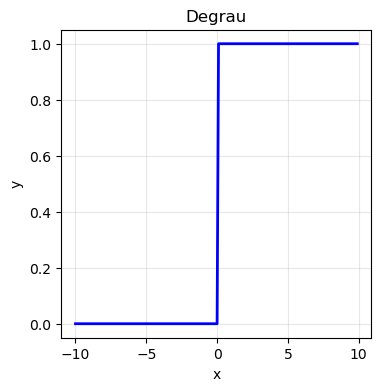

In [68]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)

#calcula a funcao degrau
y_val = degrau(x_val)
plota_grafico(x_val, y_val, 'Degrau')

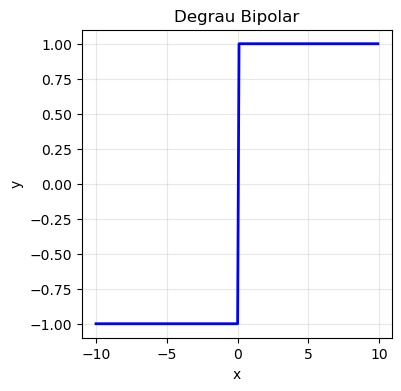

In [69]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)

#calcula a funcao degrau bipolar
y_val = degrau_bipolar(x_val)
plota_grafico(x_val, y_val, 'Degrau Bipolar')

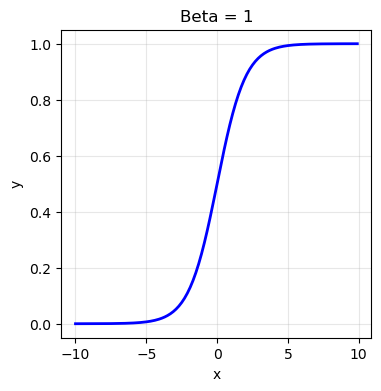

In [70]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)

#calcula a funcao logistica
beta = 1
y_val = logistica(x_val, beta)
plota_grafico(x_val, y_val, 'Beta = ' + str(beta))

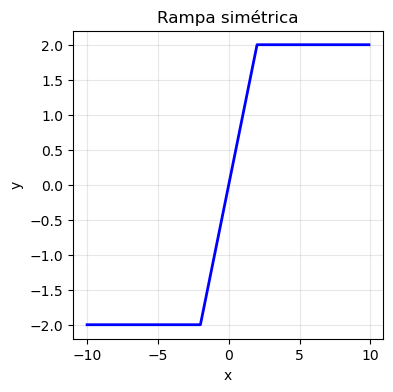

In [71]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)

#calcula a funcao rampa simetrica
y_val = rampa_simetrica(2, x_val)
plota_grafico(x_val, y_val, 'Rampa simétrica')

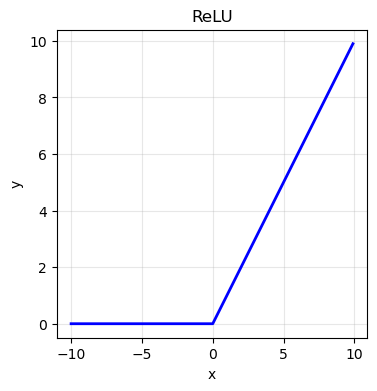

In [72]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)

#calcula a funcao relu
y_val = relu(x_val)
plota_grafico(x_val, y_val, 'ReLU')

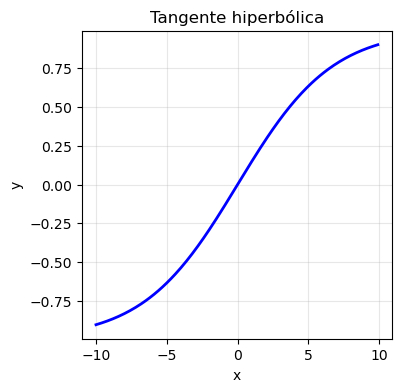

In [73]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)

#calcula a funcao tangente hiperbolica
beta = 0.3
y_val = tg_hiperbolica(beta, x_val)
plota_grafico(x_val, y_val, 'Tangente hiperbólica')

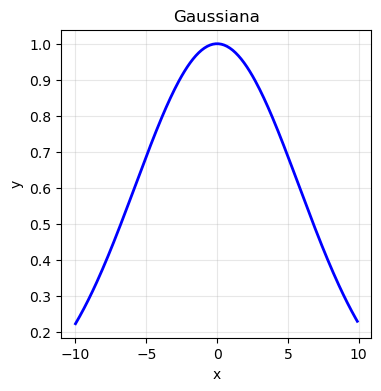

In [74]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)
std = np.std(x_val)
c = 0

#calcula a funcao gaussiana
beta = 1
y_val = gaussiana(x_val, std, c)
plota_grafico(x_val, y_val, 'Gaussiana')

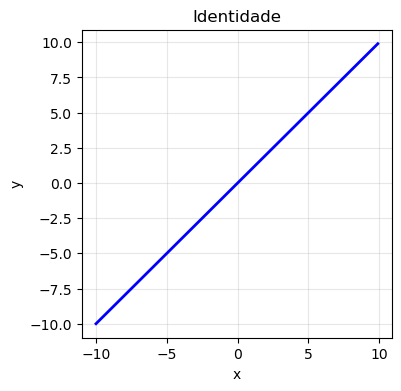

In [75]:
#gera os valores de x
x_val = np.arange(-10, 10, 0.1)

#calcula a funcao identidade
y_val = identidade(x_val)
plota_grafico(x_val, y_val, 'Identidade')